In [1]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris

### Preparing the dataset

In [2]:
# Load iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, 
                       columns=iris.feature_names)

In [3]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# the two features to be used
col1 = "sepal length (cm)"
col2 = "sepal width (cm)"

In [5]:
# new dataframe with only two features
new_df = iris_df[[col1, col2]]
new_df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

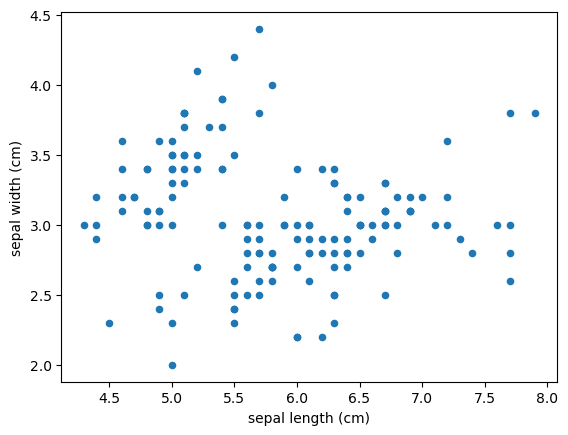

In [6]:
new_df.plot.scatter(col1, col2)

## Hierarchical Clustering

### Dendrogram

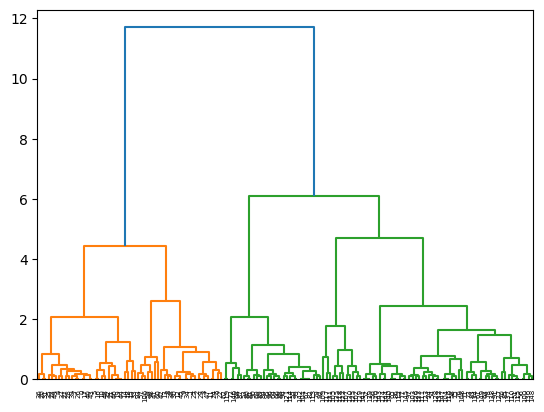

In [7]:
dendrogram = sch.dendrogram(sch.linkage(new_df, method='ward'))

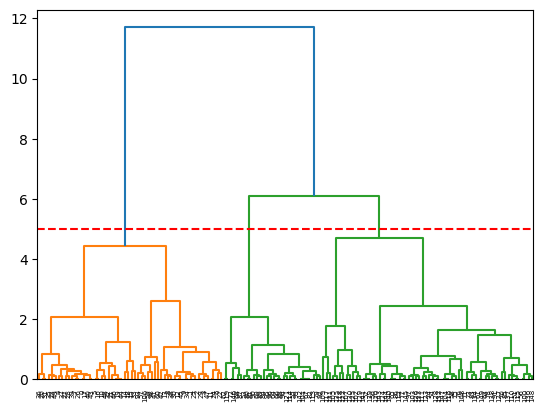

In [8]:
dendrogram = sch.dendrogram(sch.linkage(new_df, method='ward'))

# plot horizontal line at y = 5 to get 3 clusters
plt.axhline(y=5, color='r', linestyle='--')
plt.show()

In [9]:
agg_model = AgglomerativeClustering(n_clusters=3, 
                                    metric='euclidean', 
                                    linkage='ward')
agg_model.fit(new_df)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

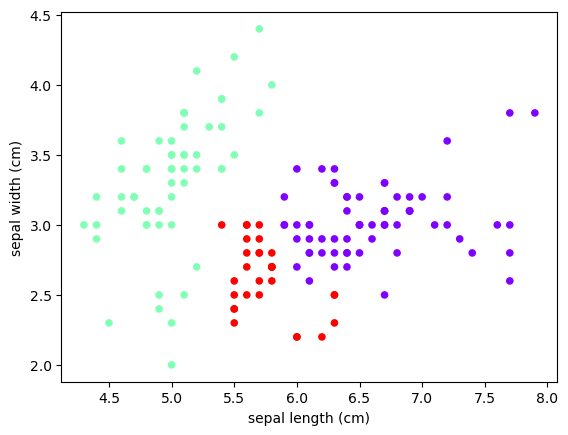

In [10]:
new_df.plot.scatter(col1, col2, c=agg_model.labels_, cmap="rainbow", colorbar=False)

## KMeans
### Silhouette Score

In [11]:
# k_range is from k=2 to k=14
k_range = range(2, 15)


for k in k_range:
    km_model = KMeans(n_clusters=k, n_init='auto', random_state=0)
    km_model.fit(new_df)
    km_labels = km_model.predict(new_df)
    avg = silhouette_score(new_df, km_labels)
    
    print((k, round(avg, 4)))


(2, 0.4635)
(3, 0.4424)
(4, 0.4273)
(5, 0.3992)
(6, 0.3924)
(7, 0.3865)
(8, 0.399)
(9, 0.4115)
(10, 0.4116)
(11, 0.3885)
(12, 0.3794)
(13, 0.3678)
(14, 0.3745)


In [12]:
km_model = KMeans(n_clusters=2, 
                  n_init='auto', random_state=0)
km_model.fit(new_df)

KMeans(n_clusters=2, n_init='auto', random_state=0)

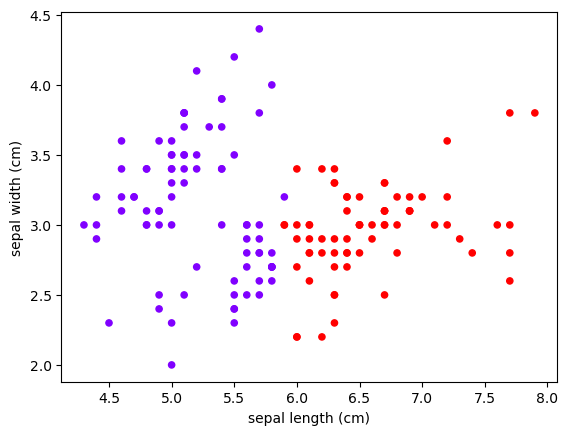

In [13]:
new_df.plot.scatter(col1, col2, c=km_model.labels_, cmap="rainbow", colorbar=False)
plt.show()

### Inertia: Elbow Method

In [14]:
# k_range is from k=1 to k=14
k_range = range(2, 15)

k_list = []
k_inertia_list = []

for k in k_range:
    km_model = KMeans(n_clusters=k, n_init="auto", random_state=1)
    km_model.fit(new_df)
    k_inertia_list.append(km_model.inertia_)
    
    k_list.append(k)
    
    print(str(k) + ": " + str(round(km_model.inertia_, 4)))

2: 58.4476
3: 37.0507
4: 28.5141
5: 21.2917
6: 17.8479
7: 14.9486
8: 13.1323
9: 11.5895
10: 9.8176
11: 8.9089
12: 8.31
13: 7.2645
14: 6.7481


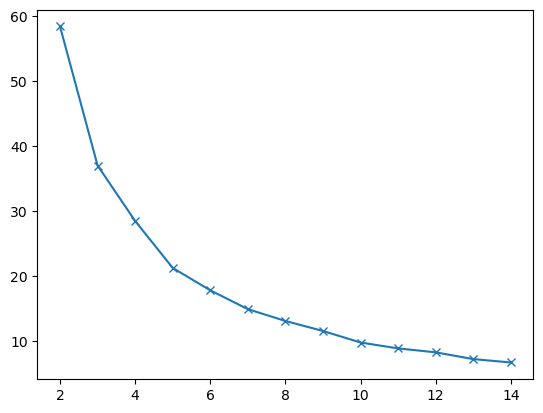

In [15]:
plt.plot(k_list, k_inertia_list, 'x-')
plt.show()

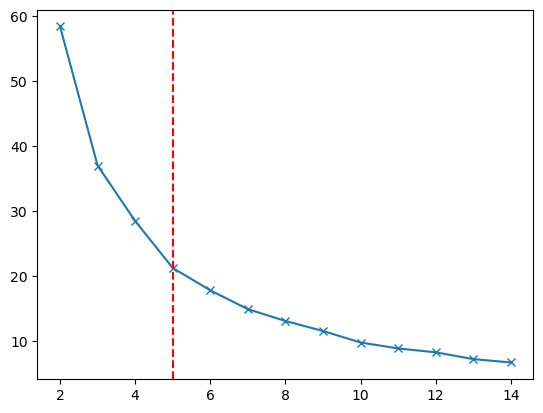

In [16]:
plt.plot(k_list, k_inertia_list, 'x-')

# plot a vertical line at x = 5
plt.axvline(x=5, color='r', linestyle='--')
plt.show()

In [17]:
km_model = KMeans(n_clusters=5, 
                  n_init="auto", 
                  random_state=1)
km_model.fit(new_df)

KMeans(n_clusters=5, n_init='auto', random_state=1)

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

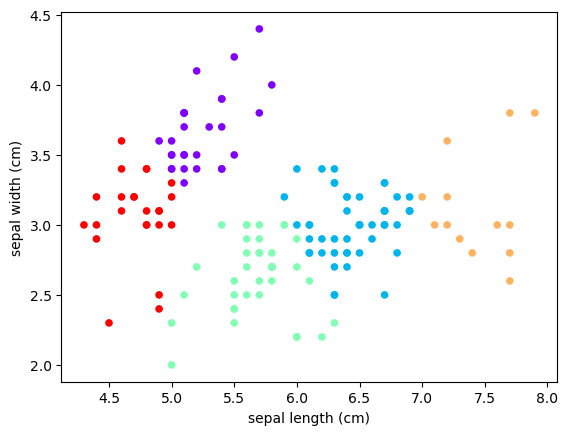

In [18]:
new_df.plot.scatter(col1, col2, c = km_model.labels_, 
                    cmap="rainbow",
                    colorbar=False)